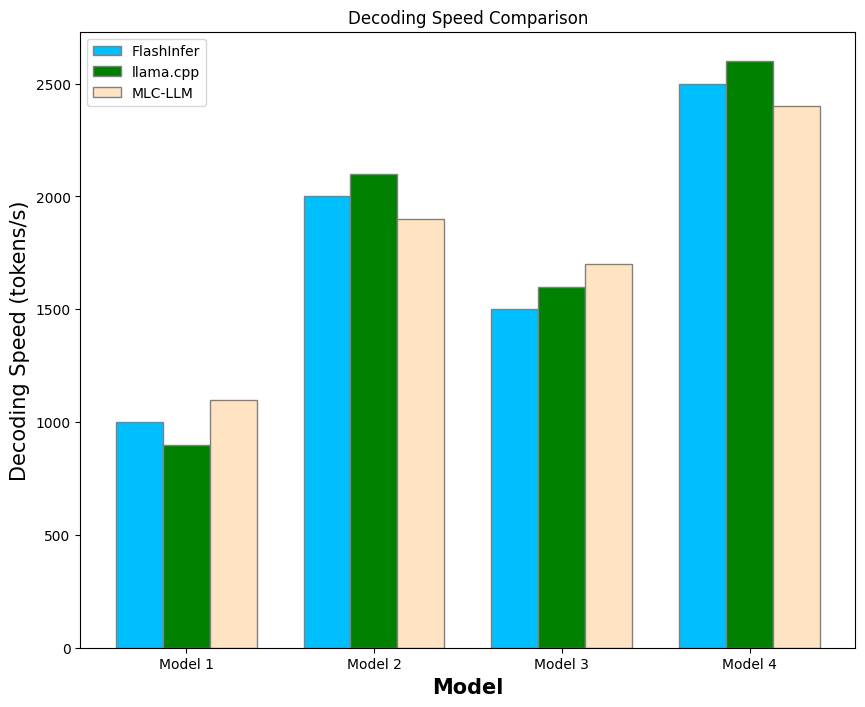

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 模型名称
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

# 假数据 - 替换这里的值为实际的生成速度(tokens/s)
# 每个模型对应三个框架的速度
speeds_flashinfer = [1000, 2000, 1500, 2500]  # FlashInfer的速度
speeds_llamacpp = [900, 2100, 1600, 2600]  # llama.cpp的速度
speeds_mlc_llm = [1100, 1900, 1700, 2400]  # MLC-LLM的速度

# 设置图表大小
plt.figure(figsize=(10, 8))

# 设置柱状图的宽度
barWidth = 0.25
 
# 设置柱状图的位置
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# 绘制柱状图
plt.bar(r1, speeds_flashinfer, color='deepskyblue', width=barWidth, edgecolor='grey', label='FlashInfer')
plt.bar(r2, speeds_llamacpp, color='g', width=barWidth, edgecolor='grey', label='llama.cpp')
plt.bar(r3, speeds_mlc_llm, color='bisque', width=barWidth, edgecolor='grey', label='MLC-LLM')

# 添加一些细节
plt.xlabel('Model', fontweight='bold', fontsize=15)
plt.ylabel('Decoding Speed (tokens/s)', fontsize=15)
plt.xticks([r + barWidth for r in range(len(models))], models)

plt.title('Decoding Speed Comparison')
plt.legend()
plt.show()

[['Mixtral-8*7B', '7.158', '0.55'], ['Bamboo-7B', '9.591', '0.52'], ['Llama-7B', '6.745', '0.61'], ['Llama-13B', '0.992', '0.23']]


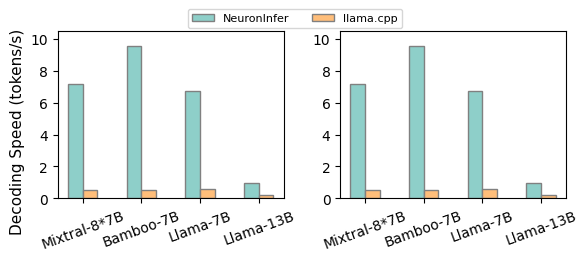

In [64]:
import csv
import matplotlib.pyplot as plt
import numpy as np

# 读取CSV文件
with open('../data/decoding.csv', 'r') as file:
    csv_reader = csv.reader(file, delimiter=' ')
    next(csv_reader)  # 跳过标题行
    data = list(csv_reader)
print(data)

# 提取模型名称和速度数据
models = [row[0] for row in data]
speeds_flashinfer = [round(float(row[1]), 2) for row in data]
speeds_llamacpp = [round(float(row[2]), 2) for row in data]

# 创建包含两个子图的图表
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2.5))

# 设置柱状图的宽度
barWidth = 0.25

# 设置柱状图的位置
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]

# 在左侧子图中绘制柱状图
ax1.bar(r1, speeds_flashinfer, color='#8ECFC9', width=barWidth, edgecolor='grey', label='NeuronInfer')
ax1.bar(r2, speeds_llamacpp, color='#FFBE7A', width=barWidth, edgecolor='grey', label='llama.cpp')

# 在左侧子图的柱子上添加数值
# for i, v in enumerate(speeds_flashinfer):
#     ax1.text(r1[i], v + 0.05, str(v), ha='center', fontsize=7)
# for i, v in enumerate(speeds_llamacpp):
#     ax1.text(r2[i], v + 0.05, str(v), ha='center', fontsize=7)

# 在右侧子图中绘制相同的柱状图
ax2.bar(r1, speeds_flashinfer, color='#8ECFC9', width=barWidth, edgecolor='grey', label='NeuronInfer')
ax2.bar(r2, speeds_llamacpp, color='#FFBE7A', width=barWidth, edgecolor='grey', label='llama.cpp')

# 在右侧子图的柱子上添加数值
# for i, v in enumerate(speeds_flashinfer):
#     ax2.text(r1[i], v + 0.05, str(v), ha='center', fontsize=7)
# for i, v in enumerate(speeds_llamacpp):
#     ax2.text(r2[i], v + 0.05, str(v), ha='center', fontsize=7)

# 添加一些细节
ax1.set_ylim(0, 10.5)
ax2.set_ylim(0, 10.5)
label = ax1.set_ylabel('Decoding Speed (tokens/s)', fontsize=11)
position = label.get_position()
new_position = (position[0], position[1] - 0.1)
label.set_position(new_position)
ax1.set_xticks([r + barWidth/2 for r in range(len(models))])
ax1.set_xticklabels(models, rotation=20)
ax2.set_xticks([r + barWidth/2 for r in range(len(models))])
ax2.set_xticklabels(models, rotation=20)
# ax1.legend(fontsize=8)
# ax2.legend(fontsize=8)
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=8, bbox_to_anchor=(0.5, 1.05),)

plt.tight_layout()
plt.savefig('decoding-performance.pdf')
plt.show()

[['Mixtral-8*7B', '7.158', '0.55'], ['Bamboo-7B', '9.591', '0.52'], ['Llama-7B', '6.745', '0.61'], ['Llama-13B', '0.992', '0.23']]


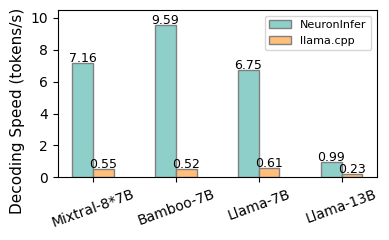

In [57]:
import csv
import matplotlib.pyplot as plt
import numpy as np

# 读取CSV文件
with open('../data/decoding.csv', 'r') as file:
    csv_reader = csv.reader(file, delimiter=' ')
    next(csv_reader)  # 跳过标题行
    data = list(csv_reader)
    print(data)

# 提取模型名称和速度数据
models = [row[0] for row in data]
speeds_flashinfer = [round(float(row[1]),2) for row in data]
speeds_llamacpp = [round(float(row[2]), 2) for row in data]

# 设置图表大小
plt.figure(figsize=(4, 2.5))

# 设置柱状图的宽度
barWidth = 0.25

# 设置柱状图的位置
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]

# 绘制柱状图
plt.bar(r1, speeds_flashinfer, color='#8ECFC9', width=barWidth, edgecolor='grey', label='NeuronInfer')
plt.bar(r2, speeds_llamacpp, color='#FFBE7A', width=barWidth, edgecolor='grey', label='llama.cpp')

# 在柱子上添加数值
for i, v in enumerate(speeds_flashinfer):
    plt.text(r1[i], v + 0.05, str(v), ha='center', fontsize=9)
for i, v in enumerate(speeds_llamacpp):
    plt.text(r2[i], v + 0.05, str(v), ha='center', fontsize=9)

# 添加一些细节
# plt.xlabel('Model', fontsize=12)
plt.ylim(0, 10.5)
ylabel = plt.ylabel('Decoding Speed (tokens/s)', fontsize=11)
position = ylabel.get_position()
new_position = (position[0], position[1] - 0.1)
ylabel.set_position(new_position)


plt.xticks([r + barWidth/2 for r in range(len(models))], models, rotation=20)
# plt.title('Decoding Speed Comparison')
plt.legend(fontsize=8)
plt.tight_layout()
plt.savefig('decoding-performance.pdf')
plt.show()

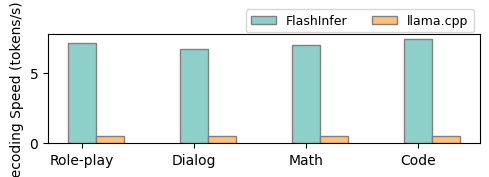

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# 模型名称
# models = ['Code', 'Math', 'Dialog', 'role-play']
models = ['Role-play', 'Dialog', 'Math', 'Code']

# 假数据 - 替换这里的值为实际的生成速度(tokens/s)
# 每个模型对应三个框架的速度
speeds_flashinfer = [7.07, 6.69, 6.99, 7.38]  # FlashInfer的速度
speeds_llamacpp = [0.55, 0.55, 0.55, 0.55]  # llama.cpp的速度
# speeds_mlc_llm = [1100, 1900, 1700, 2400]  # MLC-LLM的速度

# 设置图表大小
plt.figure(figsize=(5, 2))

# 设置柱状图的宽度
barWidth = 0.25
 
# 设置柱状图的位置
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]

# 绘制柱状图
plt.bar(r1, speeds_flashinfer, color='#8ECFC9', width=barWidth, edgecolor='grey', label='FlashInfer')
plt.bar(r2, speeds_llamacpp, color='#FFBE7A', width=barWidth, edgecolor='grey', label='llama.cpp')
# plt.bar(r3, speeds_mlc_llm, color='bisque', width=barWidth, edgecolor='grey', label='MLC-LLM')

# 添加一些细节
label = plt.ylabel('Decoding Speed (tokens/s)', fontsize=10)
position = label.get_position()
position = (position[0], position[1]-0.05)
label.set_position(position)

plt.xticks([r + barWidth/2 for r in range(len(models))], models)

# plt.title('Decoding Speed Comparison')
plt.legend(bbox_to_anchor=(1, 1.28), loc='upper right', fontsize=9, ncols=2)
plt.tight_layout()
plt.savefig('task.pdf')
plt.show()

[['Bamboo-7B', '8.234', '3.361'], ['Llama-7B', '6.365', '3.402'], ['Bamboo-7B-INT4', '14.55', '8.41']]


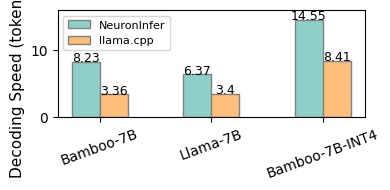

In [99]:
import csv
import matplotlib.pyplot as plt
import numpy as np

# 读取CSV文件
with open('../data/inmemory.csv', 'r') as file:
    csv_reader = csv.reader(file, delimiter=' ')
    next(csv_reader)  # 跳过标题行
    data = list(csv_reader)
    print(data)

# 提取模型名称和速度数据
models = [row[0] for row in data]
speeds_flashinfer = [round(float(row[1]),2) for row in data]
speeds_llamacpp = [round(float(row[2]), 2) for row in data]

# 设置图表大小
plt.figure(figsize=(4, 2))

# 设置柱状图的宽度
barWidth = 0.25

# 设置柱状图的位置
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]

# 绘制柱状图
plt.bar(r1, speeds_flashinfer, color='#8ECFC9', width=barWidth, edgecolor='grey', label='NeuronInfer')
plt.bar(r2, speeds_llamacpp, color='#FFBE7A', width=barWidth, edgecolor='grey', label='llama.cpp')

# 在柱子上添加数值
for i, v in enumerate(speeds_flashinfer):
    plt.text(r1[i], v + 0.05, str(v), ha='center', fontsize=9)
for i, v in enumerate(speeds_llamacpp):
    plt.text(r2[i], v + 0.05, str(v), ha='center', fontsize=9)

# 添加一些细节
# plt.xlabel('Model', fontsize=12)
plt.ylim(0, 16)
ylabel = plt.ylabel('Decoding Speed (tokens/s)', fontsize=11)
position = ylabel.get_position()
new_position = (position[0], position[1] - 0.1)
ylabel.set_position(new_position)


plt.xticks([r + barWidth/2 for r in range(len(models))], models, rotation=20)
# plt.title('Decoding Speed Comparison')
plt.legend(fontsize=8)
plt.tight_layout()
plt.savefig('in-memory-decoding-performance.pdf')
plt.show()

[['Bamboo-7B', '8.234', '3.361'], ['Llama-7B', '6.365', '3.402'], ['Bamboo-7B-INT4', '14.55', '8.41']]
[['Bamboo-7B', '69.32', '7.7'], ['Llama-7B', '75.2', '8.9'], ['Mixtral', '0.1', '30']]


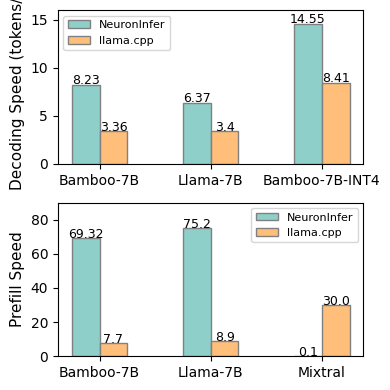

In [105]:
import csv
import matplotlib.pyplot as plt
import numpy as np

# 读取CSV文件
with open('../data/inmemory.csv', 'r') as file:
   csv_reader = csv.reader(file, delimiter=' ')
   next(csv_reader)  # 跳过标题行
   data = list(csv_reader)
print(data)

# 提取模型名称和速度数据
models = [row[0] for row in data]
speeds_flashinfer = [round(float(row[1]),2) for row in data]
speeds_llamacpp = [round(float(row[2]), 2) for row in data]

# 设置图表大小
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 4))

# 设置柱状图的宽度 
barWidth = 0.25

# 设置柱状图的位置
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]

# 绘制第一个子图的柱状图
ax1.bar(r1, speeds_flashinfer, color='#8ECFC9', width=barWidth, edgecolor='grey', label='NeuronInfer')
ax1.bar(r2, speeds_llamacpp, color='#FFBE7A', width=barWidth, edgecolor='grey', label='llama.cpp')

# 在第一个子图的柱子上添加数值
for i, v in enumerate(speeds_flashinfer):
   ax1.text(r1[i], v + 0.05, str(v), ha='center', fontsize=9)
for i, v in enumerate(speeds_llamacpp):
   ax1.text(r2[i], v + 0.05, str(v), ha='center', fontsize=9)

ax1.set_ylim(0, 16)  
ax1.set_ylabel('Decoding Speed (tokens/s)', fontsize=11)
ax1.set_xticks([r + barWidth/2 for r in range(len(models))])
ax1.set_xticklabels(models)
ax1.legend(fontsize=8)

# 读取CSV文件
with open('../data/inmemory-prefill.csv', 'r') as file:
   csv_reader = csv.reader(file, delimiter=' ')
   next(csv_reader)  # 跳过标题行
   data = list(csv_reader)
print(data)
models = [row[0] for row in data]
speeds_flashinfer = [round(float(row[1]),2) for row in data]
speeds_llamacpp = [round(float(row[2]), 2) for row in data]

# 绘制第二个子图的柱状图
ax2.bar(r1, speeds_flashinfer, color='#8ECFC9', width=barWidth, edgecolor='grey', label='NeuronInfer')  
ax2.bar(r2, speeds_llamacpp, color='#FFBE7A', width=barWidth, edgecolor='grey', label='llama.cpp')

# 在第二个子图的柱子上添加数值
for i, v in enumerate(speeds_flashinfer):
   ax2.text(r1[i], v + 0.05, str(v), ha='center', fontsize=9)
for i, v in enumerate(speeds_llamacpp):
   ax2.text(r2[i], v + 0.05, str(v), ha='center', fontsize=9)

ax2.set_ylim(0, 90)
ax2.set_ylabel('Prefill Speed', fontsize=11)  
ax2.set_xticks([r + barWidth/2 for r in range(len(models))])
ax2.set_xticklabels(models)
ax2.legend(fontsize=8)

plt.tight_layout()
plt.savefig('in-memory-decoding-performance.pdf') 
plt.show()